# Logistic Regression
This notebook demonstrates how to use logistic regression for binary classification tasks using the `LogisticRegression` class from `sklearn.linear_model`. It includes data preparation, model training, and evaluation.

## Libraries

In [1]:
# If you do not have stopwords
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/tofeha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Misc
import os
import numpy as np
import pandas as pd

# Training
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


# Plotting
import matplotlib.pyplot as plt 

# Environment variables
import sys
sys.path.append("../")
from env import DATA, SEED, LABEL_MAPPING, preprocess


Check if the `phsihing_email_cleaned.zip` file is available in the current directory.

If not, run the `EDA.ipynb` notebook to preprocess the dataset and save it as `phishing_email_cleaned.csv`.

In [3]:
!if [ ! -f "{DATA}/phishing_email_cleaned.zip" ]; then echo "File not found! Run EDA.ipynb preprocessing first."; exit 1; fi

## Step 0: Preprocessing

This step is partly completed in the `EDA.ipynb` notebook. We will then encode the text data in the pipeline.

In [4]:
emails = pd.read_csv(f"{DATA}/phishing_email_cleaned.zip", compression="zip")
emails["text"] = emails["text"].astype(str)

# We will use the 'text' column, not the cleaned one.
emails["cleaned_text"] = emails["text"].apply(preprocess)

In [5]:
emails.tail(5)

,text,label,cleaned_text
18645,date a lonely housewife always wanted to date ...,1,date a lonely housewife always wanted to date ...
18646,request submitted : access request for anita ....,0,request submitted access request for anita dup...
18647,"re : important - prc mtg hi dorn & john , as y...",0,re important prc mtg hi dorn john as you disco...
18648,press clippings - letter on californian utilit...,0,press clippings letter on californian utilitie...
18649,empty,1,empty


## Step 1: Model creation and tuning

Here are the key steps involved in creating and tuning the logistic regression model:
1. opword removal with `nltk.corpus.stopwords`.
2. `TfidfVectorizer`to encode text data into numerical format.
3. `Pipeline` to tune hyperparameters and streamline the workflow.

Without `TfidfVectorizer`, the model would not be able to process the text data directly.

In [6]:
# Remove english stop words
english_stop_words = stopwords.words("english")

# Pipeline to fine-tune encoding and model
# No need to fit_transform, pipeline will do it
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words=english_stop_words, ngram_range=(1, 2), max_df = 0.9, max_features=350000)),
    ("clf", LogisticRegression(random_state = SEED, solver = "sag", penalty = "l2", verbose = 1, class_weight="balanced"))
])


Hyperparameter fields are commented to avoid further tuning, but you can uncomment them to explore different configurations.

In [7]:
# Hyperparameter grid
param_grid = [
    {
    #    "tfidf__ngram_range": [(1, 1), (1, 2), (1, 3)],
    #    "tfidf__max_features": [None, 350000],
    #    "clf__class_weight": [None, "balanced"],
    #    "clf__solver": ["lbfgs", "sag"],
    #    "clf__penalty": ["l1", "l2"],
    }
]

clf = GridSearchCV(pipeline, param_grid, n_jobs = 4, cv = 3, verbose = True)

## Step 2: Training

In [8]:
x, y = emails["text"], emails["label"]
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED, stratify=y)

In [9]:
clf.fit(x_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Epoch 1, change: 1
Epoch 2, change: 0.16885785
Epoch 3, change: 0.070753463
Epoch 4, change: 0.072535336
Epoch 5, change: 0.047594605
Epoch 6, change: 0.01743505
Epoch 7, change: 0.01013454
Epoch 8, change: 0.0059270882
Epoch 9, change: 0.010985623
Epoch 10, change: 0.018036769
Epoch 11, change: 0.0086885477
Epoch 12, change: 0.0010979929
Epoch 13, change: 0.0031002872
Epoch 14, change: 0.00049556428
Epoch 15, change: 0.00022807822
Epoch 16, change: 0.00018324411
Epoch 17, change: 0.0001129124
convergence after 18 epochs took 1 seconds
Epoch 1, change: 1
Epoch 2, change: 0.21413543
Epoch 3, change: 0.062870928
Epoch 4, change: 0.048062216
Epoch 1, change: 1
Epoch 5, change: 0.023787782
Epoch 2, change: 0.15651265
Epoch 6, change: 0.035085459
Epoch 3, change: 0.08337922
Epoch 7, change: 0.029223939
Epoch 4, change: 0.033932032
Epoch 8, change: 0.017753128
Epoch 5, change: 0.052564644
Epoch 9, change: 0.011618046
Epoch 6, change:

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_df=0.9,
                                                        max_features=350000,
                                                        ngram_range=(1, 2),
                                                        stop_words=['a',
                                                                    'about',
                                                                    'above',
                                                                    'after',
                                                                    'again',
                                                                    'against',
                                                                    'ain',
                                                                    'all', 'am',
                                                                    'an', 'and',
                                                                    'any',
                                                                    'are',
                                                                    'aren',
                                                                    "aren't",
                                                                    'as', 'at',
                                                                    'be',
                                                                    'because',
                                                                    'been',
                                                                    'before',
                                                                    'being',
                                                                    'below',
                                                                    'between',
                                                                    'both',
                                                                    'but', 'by',
                                                                    'can',
                                                                    'couldn',
                                                                    "couldn't", ...])),
                                       ('clf',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=42,
                                                           solver='sag',
                                                           verbose=1))]),
             n_jobs=4, param_grid=[{}], verbose=True)

In [10]:
model = clf.best_estimator_
print(f"Best parameters: {model.get_params()}")

Best parameters: {'memory': None, 'steps': [('tfidf', TfidfVectorizer(max_df=0.9, max_features=350000, ngram_range=(1, 2),
                stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...])), ('clf', LogisticRegression(class_weight='balanced', random_state=42, solver='sag',
                   verbose=1))], 'transform_input': None, 'verbose': False, 'tfidf': TfidfVectorizer(max_df=0.9, max_features=350000, ngram_range=(1, 2),
                stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                   

## Step 3: Evaluation

In [11]:
y_pred = model.predict(x_test)

### Metrics

In [12]:
# Compare the results with the actual y values
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


In [13]:
print(classification_report(y_test, y_pred, zero_division=0))

results = classification_report(y_test, y_pred, zero_division=0, output_dict=True)

recall_avg = results["weighted avg"]["recall"]
f1_score_avg = results["weighted avg"]["f1-score"]
precision_avg = results["weighted avg"]["precision"]

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2264
           1       0.94      0.98      0.96      1466

    accuracy                           0.97      3730
   macro avg       0.96      0.97      0.97      3730
weighted avg       0.97      0.97      0.97      3730



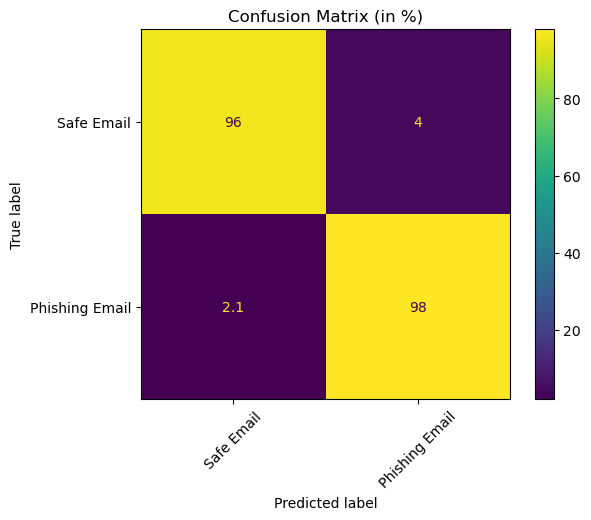

In [14]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# With percentage
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

heat = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= list(LABEL_MAPPING.values()))
fig, ax = plt.subplots()
heat.plot(ax=ax)
plt.title('Confusion Matrix (in %)')
plt.xticks(rotation=45)
plt.show()

## Exploration
### Text preprocessing
Initially, we cleaned anything that was not a word: numbers, punctuation, and special characters. We also converted all text to lowercase to ensure uniformity.

We observed that the training did not differ much, and the performance was slightly worse than the original dataset. Therefore, we decided to keep the text as it is without further preprocessing.

### Dataset Imbalance
This dataset has a class imbalance, with more safe emails than phishing emails. To address this, we tried using `SMOTE` (Synthetic Minority Over-sampling Technique) to balance the dataset.

However, we found that it did not significantly improve the model's performance and introduced some noise in the classification results: More safe emails are classified as phishing emails, and less phishing emails are classified as safe emails. We decided to remove this step.

## Conclusion
Logistic regression is the perfect model for binary classification tasks. It is simple, interpretable, and effective for this type of problem. The precision score of 0.98 indicates that the model is highly accurate in predicting phishing emails, with very few false positives.

Overall, the logistic regression model achieved an impressive accuracy, indicating that it can effectively distinguish between phishing and safe emails.